# VIDEO GAMES SALES 

Description

1. Rank - Ranking of overall sales
2. Name - The games name
3. Platform - Platform of the games releasa (i.e PC,PS4, etc)
4. Year - Year of the games release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

Dataset is from Kaggle :https://www.kaggle.com/gregorut/videogamesales

Import Pandas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read the Dataset

In [13]:
vg = pd.read_csv('vgsales.csv')
vg.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Identify missing data

In [14]:
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [49]:
vg = vg.dropna(subset=['Publisher', 'Year'], axis=0)
vg = vg.reset_index(drop=True)
vg.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [50]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


What genre games have been made the most?

In [17]:
vg['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

# WHICH GENRE MOST SALE IN WORLDWIDE?

In [18]:
vg.groupby('Genre').sum().sort_values(['Global_Sales'], ascending = False).head(5) 


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,25955792,6527703.0,861.77,516.48,158.65,184.92,1722.84
Sports,17105195,4620621.0,670.09,371.34,134.76,132.65,1309.24
Shooter,9399409,2571588.0,575.16,310.45,38.18,101.90,1026.20
Role-Playing,11840252,2950365.0,326.50,187.57,350.29,59.38,923.83
Platform,6019939,1753335.0,445.99,200.65,130.65,51.51,829.13


In [19]:
global_sales_genre = vg.groupby(by=['Genre'])['Global_Sales'].sum().head(5)
print(global_sales_genre)

Genre
Action       1722.84
Adventure     234.59
Fighting      444.05
Misc          789.87
Platform      829.13
Name: Global_Sales, dtype: float64


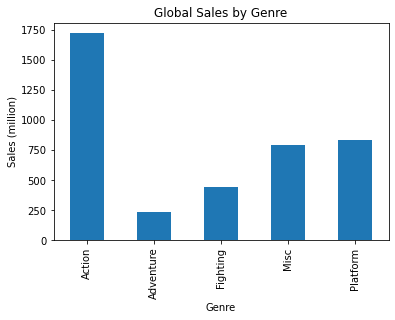

In [20]:
#visualization data
global_sales_genre.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Sales (million)')
plt.title('Global Sales by Genre')
plt.show()

# WHICH PLATFORM MOST SALE IN WORLWIDE?

In [22]:
global_sales_platform = vg[['Platform','Global_Sales']].groupby('Platform').sum().sort_values('Global_Sales', ascending=False).head(5)
print(global_sales_platform)

          Global_Sales
Platform              
PS2            1233.46
X360            969.60
PS3             949.35
Wii             909.81
DS              818.91


<AxesSubplot:xlabel='Platform'>

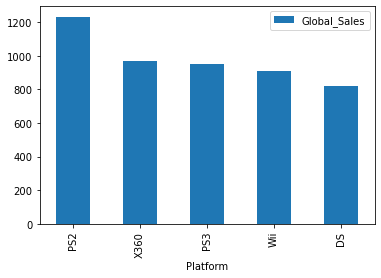

In [23]:
global_sales_platform.plot.bar()

# MOST GAME SALES WORLDWIDE?

In [24]:
global_sales_name = vg.groupby('Name').sum().sort_values(['Global_Sales'], ascending=False)['Global_Sales'].head(5)
print(global_sales_name)

Name
Wii Sports            82.74
Grand Theft Auto V    55.92
Super Mario Bros.     45.31
Tetris                35.84
Mario Kart Wii        35.82
Name: Global_Sales, dtype: float64


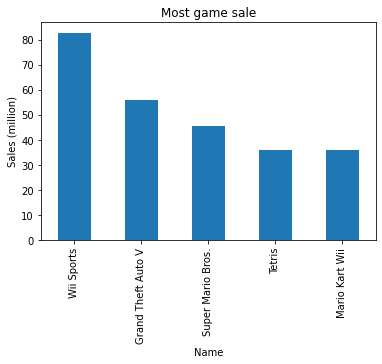

In [25]:
global_sales_name.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Sales (million)')
plt.title('Most game sale')
plt.show()

# MAXIMUM GLOBAL SALES IN YEAR


In [26]:
vg[['Year', 'Global_Sales']].groupby('Year').max().sort_values('Global_Sales',ascending=False).head(5)

,Global_Sales
Year,
2006.0,82.74
1985.0,40.24
2008.0,35.82
2009.0,33.00
1996.0,31.37


Text(0, 0.5, 'Sales (in millions)')

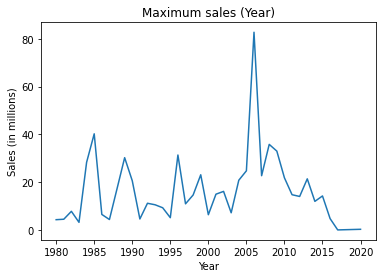

In [27]:
vg.groupby('Year').Global_Sales.max().plot(kind='line')
plt.title('Maximum sales (Year)')
plt.ylabel('Sales (in millions)')


HOW MUCH GLOBAL SALES IN WHOLE SALE?

In [28]:
vg['Global_Sales'].sum()

8811.97

# THE HIGHEST GAME SALE IN JEPUN, NORTH AMERICA, EUROPS, AND OTHERS?

In [29]:
high_JP_sales = vg[['Name','JP_Sales']].groupby('Name').max().sort_values('JP_Sales',ascending=False).head(5)
high_NA_sales = vg[['Name','NA_Sales']].groupby('Name').max().sort_values('NA_Sales',ascending=False).head(5)
high_EU_sales = vg[['Name','EU_Sales']].groupby('Name').max().sort_values('EU_Sales',ascending=False).head(5)
high_Other_sales = vg[['Name','Other_Sales']].groupby('Name').max().sort_values('Other_Sales',ascending=False).head(5)


In [30]:
high_JP_sales.head(5)

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.81
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04


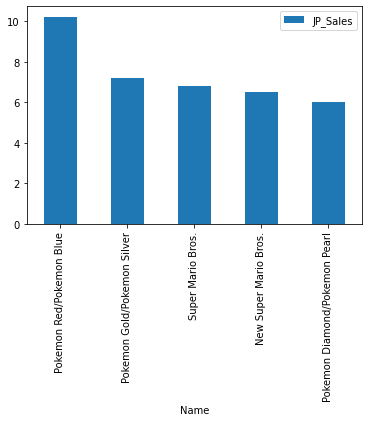

In [31]:
high_JP_sales.plot.bar();

In [32]:
high_NA_sales.head(5)

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,29.08
Duck Hunt,26.93
Tetris,23.20
Mario Kart Wii,15.85


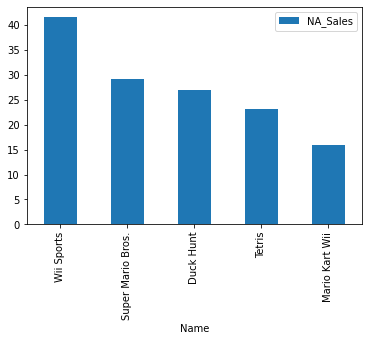

In [33]:
high_NA_sales.plot.bar();

In [34]:
high_EU_sales.head(5)

,EU_Sales
Name,
Wii Sports,29.02
Mario Kart Wii,12.88
Wii Sports Resort,11.01
Nintendogs,11.00
Grand Theft Auto V,9.27


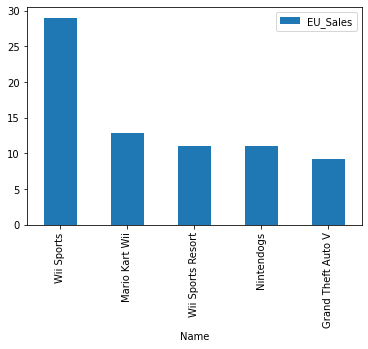

In [35]:
high_EU_sales.plot.bar();

In [36]:
high_Other_sales.head(5)

,Other_Sales
Name,
Grand Theft Auto: San Andreas,10.57
Wii Sports,8.46
Gran Turismo 4,7.53
Grand Theft Auto V,4.14
Mario Kart Wii,3.31


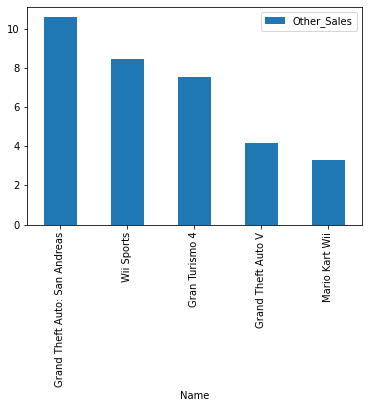

In [37]:
high_Other_sales.plot.bar();

In [38]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#  SALES ACROSS REGIONS 

In [39]:
regions_sales = vg.iloc[:,6:10 ]
regions_sales = regions_sales.sum()
regions_sales

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

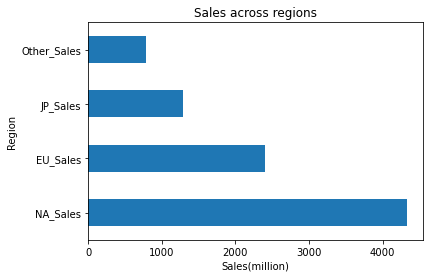

In [40]:
regions_sales.plot(kind='barh')
plt.xlabel('Sales(million)')
plt.ylabel('Region')
plt.title('Sales across regions')
plt.show()

# Unique Genre, Platform, Publisher

In [41]:
vg.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [42]:
vg.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [43]:
vg.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

# THE GENRE, CLASS!

In [44]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [45]:
vg['Genre'].value_counts()


Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [46]:
class Genre():
    def __init__(self):
        self.counts = 3000
        print("The best game genre!")
    def must (self,amount):
        self.counts +=500
        print("I have to play it!")
    def get (self,amount):
        self.counts < 3000
        print("I can try it sometimes")
    def try_me (self,amount):
        self.counts < 1000
        print("Okay, I will try it later")
    
    

In [47]:
genre = Genre()
genre.must(3100)
genre.get(2000)
genre.try_me(900)

print()

The best game genre!
I have to play it!
I can try it sometimes
Okay, I will try it later



# VIDEO GAME SALE CONCLUSION

In [48]:
game_favorite_genre = ("Action genre", "the best genre sales in worldwide","example", "like", 3251,"Grand Theft", "FIFA Soccer 13","Resident Evil 2")
game_favorite_name = ("Super Mario", "is in top 5 for four sales","in","for", "NA_Sales", "JP_Sales", "EU_Sales, Other_sales")
favorite_platform_use = ("Ps2 is the most platform use", "in world wide","for example", "Kingdom Hearts", "Medal of Honor: Frontline", "Final Fantasy XII")

print("Data analysis summary :")

print(game_favorite_genre[0], game_favorite_genre[1], game_favorite_genre[3],  game_favorite_genre[5])

print(game_favorite_name[0], game_favorite_name[1])

print(favorite_platform_use[0], favorite_platform_use[1], favorite_platform_use[2], favorite_platform_use[3])


Data analysis summary :
Action genre the best genre sales in worldwide like Grand Theft
Super Mario is in top 5 for four sales
Ps2 is the most platform use in world wide for example Kingdom Hearts
